In [47]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [48]:
data = pd.read_csv('/content/twitter_training.csv')

In [49]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [8]:
col_names=['ID','Entity','Sentiment','Contest']
df=pd.read_csv('/content/twitter_training.csv',names=col_names)

In [50]:
df.head()

,ID,Entity,Sentiment,Contest
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [51]:
df.shape

(71656, 4)

In [52]:
df.describe(include='all')

,ID,Entity,Sentiment,Contest
count,71656.000000,71656,71656,71656
unique,NaN,32,4,69491
top,NaN,TomClancysRainbowSix,Negative,"At the same time, despite the fact that there ..."
freq,NaN,2328,21698,172
mean,6436.437242,NaN,NaN,NaN
std,3742.291368,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3199.000000,NaN,NaN,NaN
50%,6432.500000,NaN,NaN,NaN
75%,9604.000000,NaN,NaN,NaN


In [53]:
df.describe

<bound method NDFrame.describe of          ID       Entity Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                 Contest  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between the windows partition of...  
74681  Just like the windows partition of my Mac is l...  

[71656 rows x 4 columns]>

In [54]:
df.isnull().sum()

,0
ID,0
Entity,0
Sentiment,0
Contest,0


In [56]:
df.dropna(axis=0,inplace=True)

In [55]:
df.isnull().sum()

,0
ID,0
Entity,0
Sentiment,0
Contest,0


In [28]:
df.duplicated().sum()

np.int64(2340)

In [29]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [30]:
df.shape

(71656, 4)

In [57]:
sentiments_count=df['Sentiment'].value_counts()
sentiments_count

,count
Sentiment,
Negative,21698
Positive,19713
Neutral,17708
Irrelevant,12537


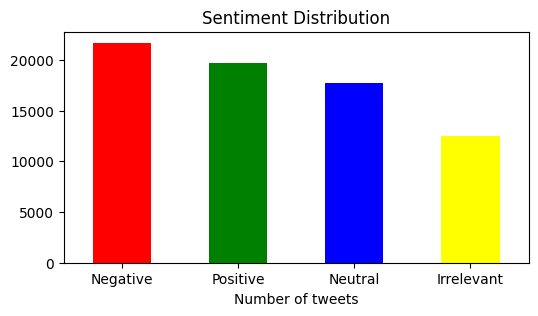

In [58]:
plt.figure(figsize=(6,3))
sentiments_count.plot(kind='bar',color=['red','green','blue','yellow'])
plt.title('Sentiment Distribution')
plt.xlabel('Number of tweets')
plt.xticks(rotation=0)
plt.show()

In [59]:
brand_data=df[df['Entity'].str.contains('Microsoft',case=False)]
brand_sentiments_counts=brand_data['Sentiment'].value_counts()
brand_sentiments_counts


,count
Sentiment,
Neutral,816
Negative,748
Positive,573
Irrelevant,167


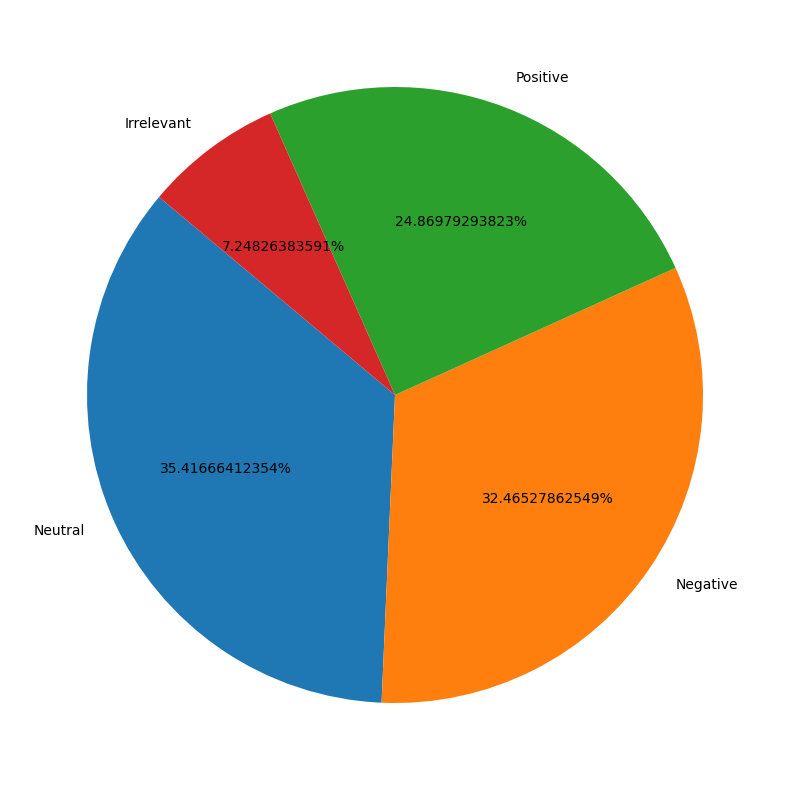

In [62]:
plt.figure(figsize=(10,10))
plt.pie(brand_sentiments_counts,labels=brand_sentiments_counts.index,autopct='%1.11f%%',startangle=140)
plt.show()
